# Líneas de campo 

> Dr. Ricardo Méndez Fragoso

En este notebook se expone la forma de crear líneas de campo de un campo vectorial. En particular se muestran ejemplos de campo eléctrico, magnético y gravitacional. Las bibliotecas que utilizaremos en este notebook son las siguientes:

In [1]:
from pylab import *
from scipy.integrate import *

El campo eléctrico, $\vec E$, que produce una carga está dado por la siguiente expresión:
$$
\vec E = \frac{1}{4\pi \epsilon _0} \frac{q}{|\vec r- \vec r_q|^2} \widehat{(\vec r- \vec r_q)}
$$
donde $q$ es la magnitud de la carga eléctrica, $\vec r$ es la posición donde se mide el campo $\vec E$, y $\vec r_q$ es la posición de la carga eléctrica. Con la siguiente función podemos calcular el campo eléctrico $\vec E$ de una carga.

In [2]:
def carga(x,x_q,q):
    r_rp = ( (x[0]-x_q[0])**2 + (x[1]-x_q[1])**2 )**1.5
    Ex = (x[0]-x_q[0])/r_rp
    Ey = (x[1]-x_q[1])/r_rp
    return q*array([Ex,Ey])

La ventaja de definir la función anterior es que podemos calcular el campo eléctrico de un conjunto de cargas utilizando la superposición de cargas de la siguiente manera:
$$
\vec E = \frac{1}{4\pi \epsilon _0} \sum _{i=1} ^N \frac{q_i}{|\vec r- \vec r_{q_i}|^2} \widehat{(\vec r- \vec r_{q_i})}
$$

A continuación dibujamos el campo eléctrico de un dipolo eléctrico, es decir dos cargas con la misma magnitud y signo opuesto.

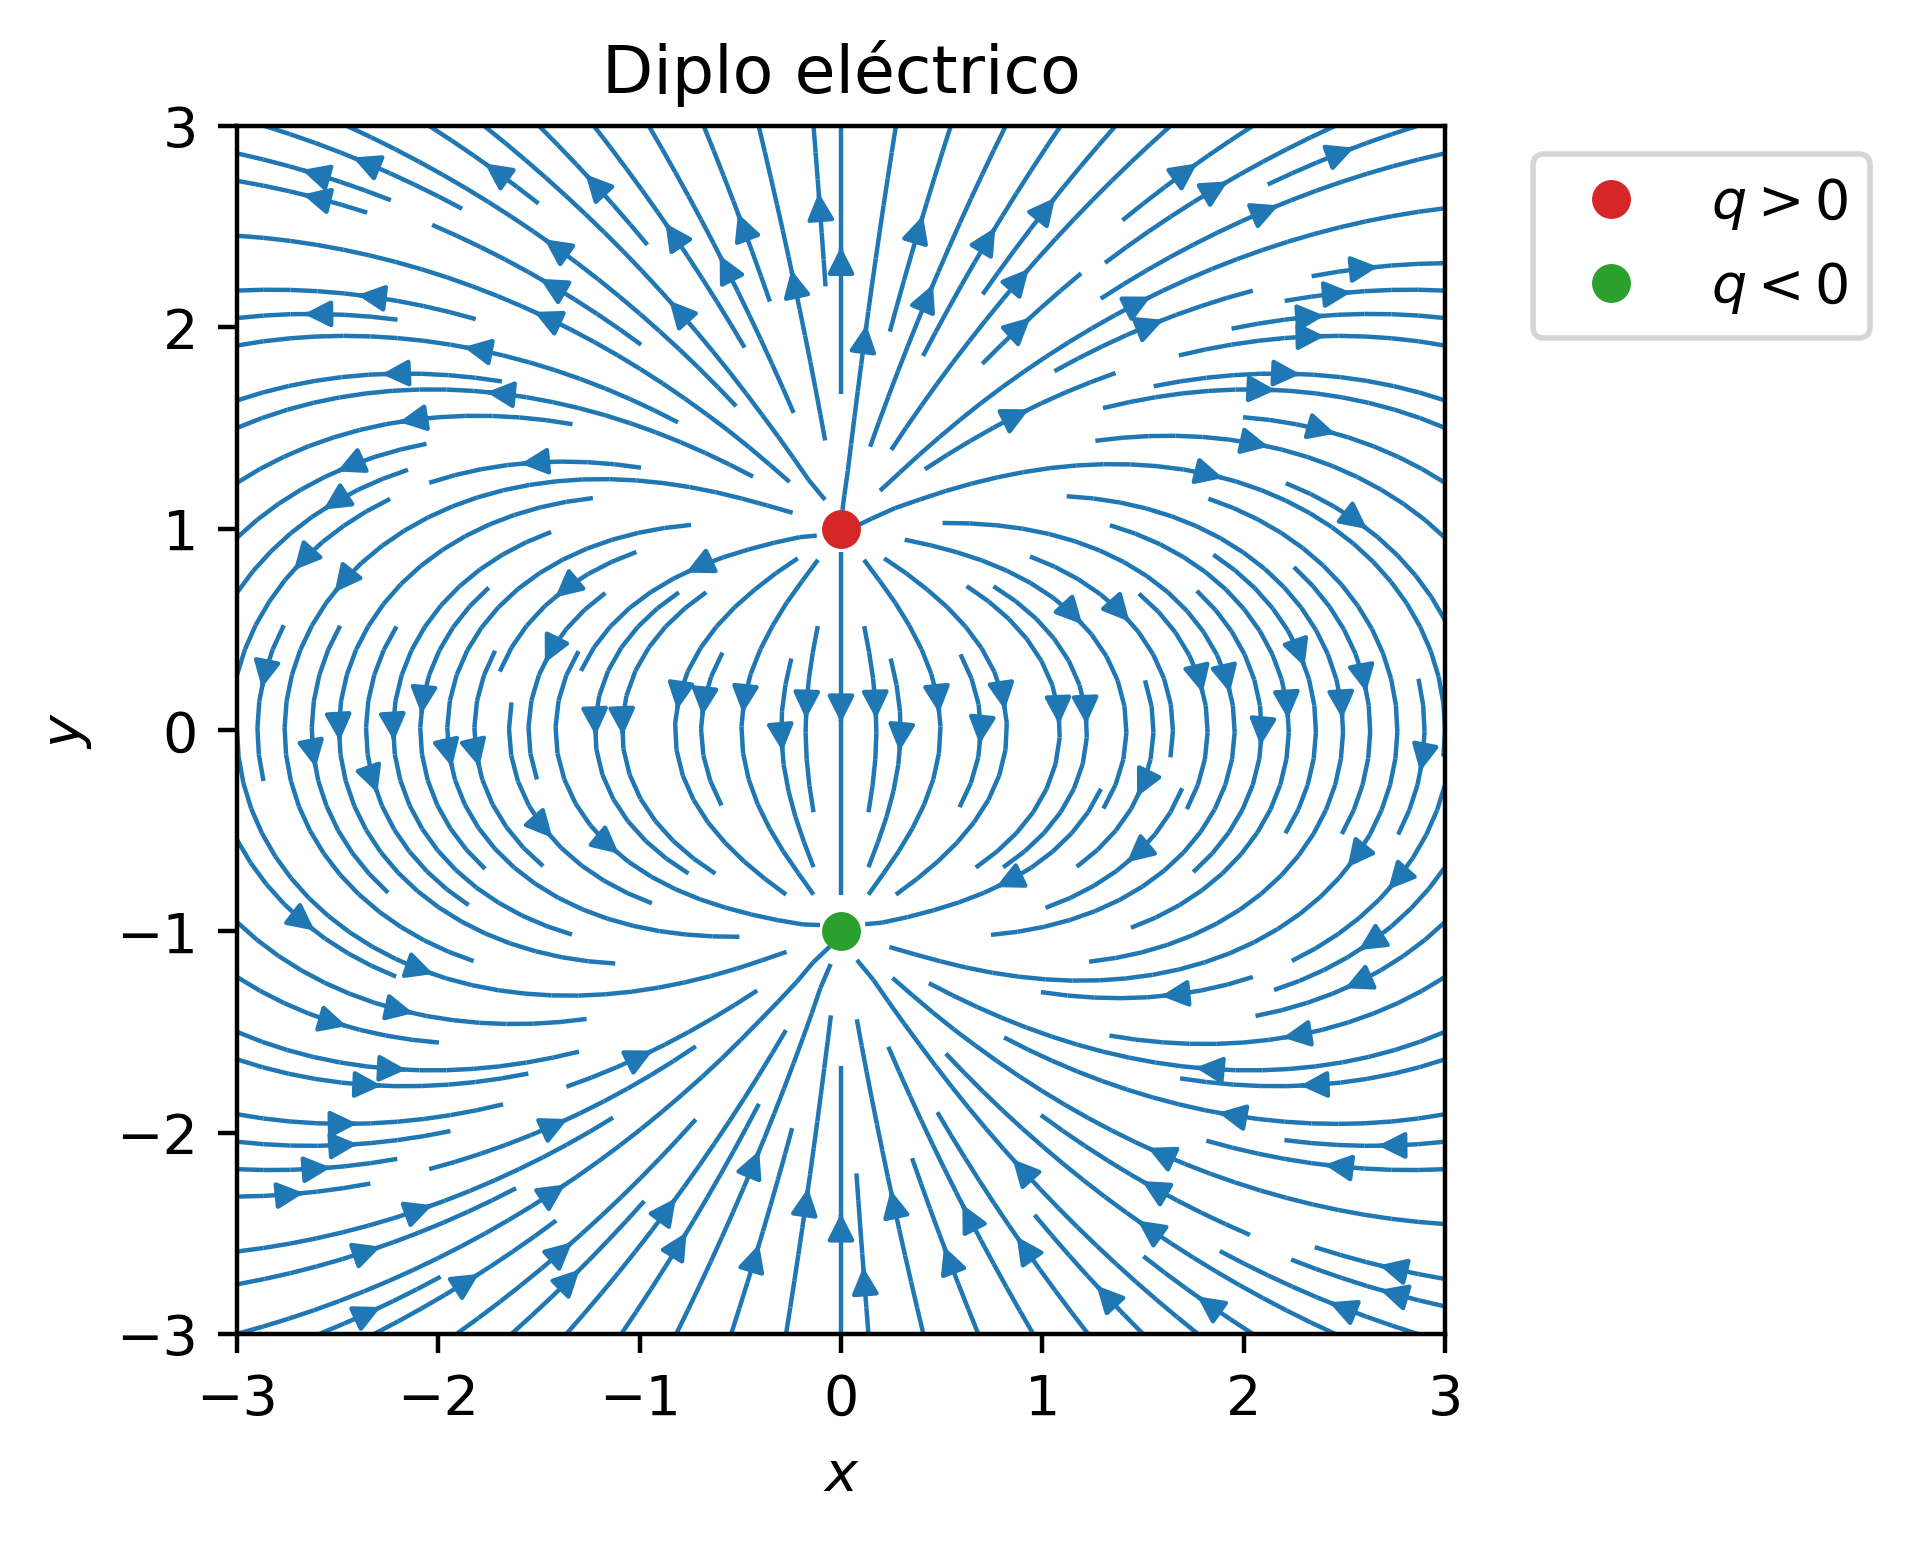

In [3]:
x,y = linspace(-3,3),linspace(-3,3)
xv,yv = meshgrid(x,y)
E = carga([xv,yv],[0,-1],-1) + carga([xv,yv],[0,1],1) # Campo del diplo

figure(dpi=200)
streamplot(xv,yv,E[0],E[1],density=1.5,linewidth=0.8)
plot([0],[1],'o',color="tab:red",label="$q>0$")
plot([0],[-1],'o',color="tab:green",label="$q<0$")
title("Diplo eléctrico"),xlabel("$x$"),ylabel("$y$"),gca().set_aspect("equal")
legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
show()

En la siguiente celda se puede observar 

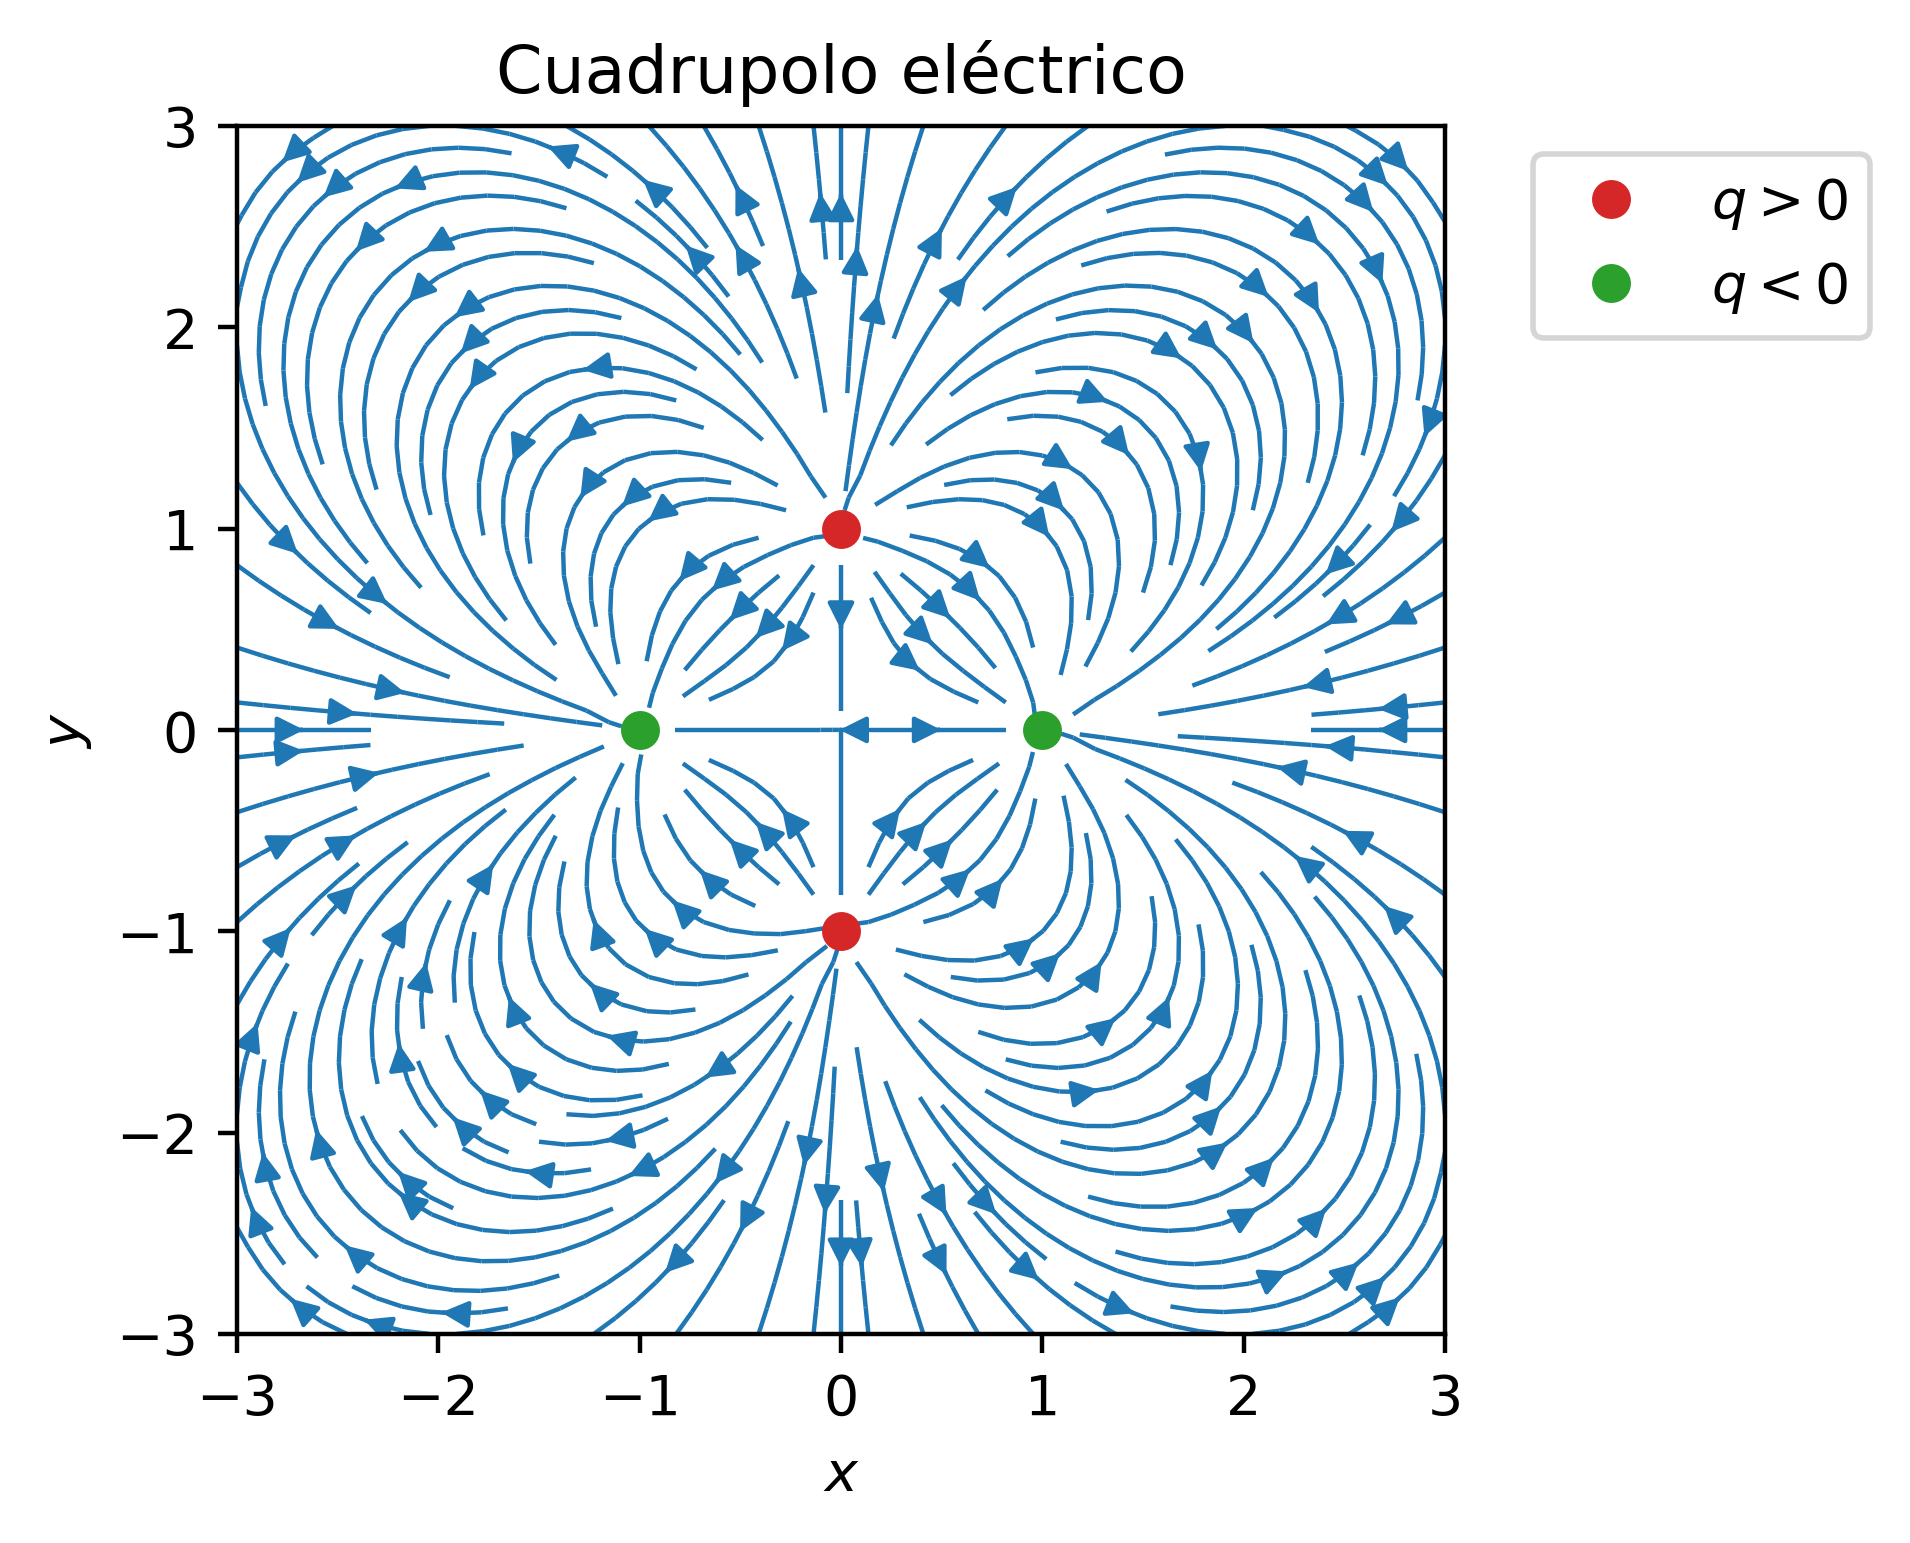

In [33]:
x,y = linspace(-3,3),linspace(-3,3)
xv,yv = meshgrid(x,y)
E = carga([xv,yv],[0,-1],1) + carga([xv,yv],[0,1],1) # Campo de un cuadrupolo parte 1
E += carga([xv,yv],[-1,0],-1) + carga([xv,yv],[1,0],-1) # Campo de un cuadrupolo parte 2

figure(dpi=200)
streamplot(xv,yv,E[0],E[1],density=1.5,linewidth=0.8)
plot([0,0],[-1,1],'o',color="tab:red",label="$q>0$")
plot([-1,1],[0,0],'o',color="tab:green",label="$q<0$")
title("Cuadrupolo eléctrico"),xlabel("$x$"),ylabel("$y$"),gca().set_aspect("equal")
legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
show()

Una forma alternativa de dibujar las líneas de campo es viendo las ecuaciones diferenciales que define el campo vectorial de la siguiente manera  $\frac{d \vec \ell}{dt} = \vec F$, donde $\vec F$ es el campo vectorial. La integración de estas ecuaciones nos proporciona las líneas de campo a partir de un punto inicial:

$$
\vec \ell = \vec \ell _0 + \int _0 ^t \vec F dt
$$

Con la siguiente función podemos definir las ecuaciones diferenciales para el dipolo eléctrico:

In [34]:
def dipolo(t,x,x_q=[[0,-1],[0,1]],qs=[-1,1]):
    E = carga(x,x_q[0],qs[0]) + carga(x,x_q[1],qs[1])
    return E

Debido a que el campo diverge en la posición de las cargas, es conveniente poner una condición para detener la integración en caso de que estar muy cerca de la posición de las cargas. Esto se puede expresar con la siguiente función, misma que evalúa el valor del campo en la zona de cálculo y proporciona un valor de verdadero o falso respecto a una cierta tolerancia.

In [62]:
def condicion(t,x,x_q=[[0,-1],[0,1]],qs=[-1,1]):
    return norm(dipolo(0,x)) < 1e4
condicion.terminal = True

In [63]:
De esta manera podemos 

SyntaxError: invalid syntax (<ipython-input-63-2ce39542309e>, line 1)

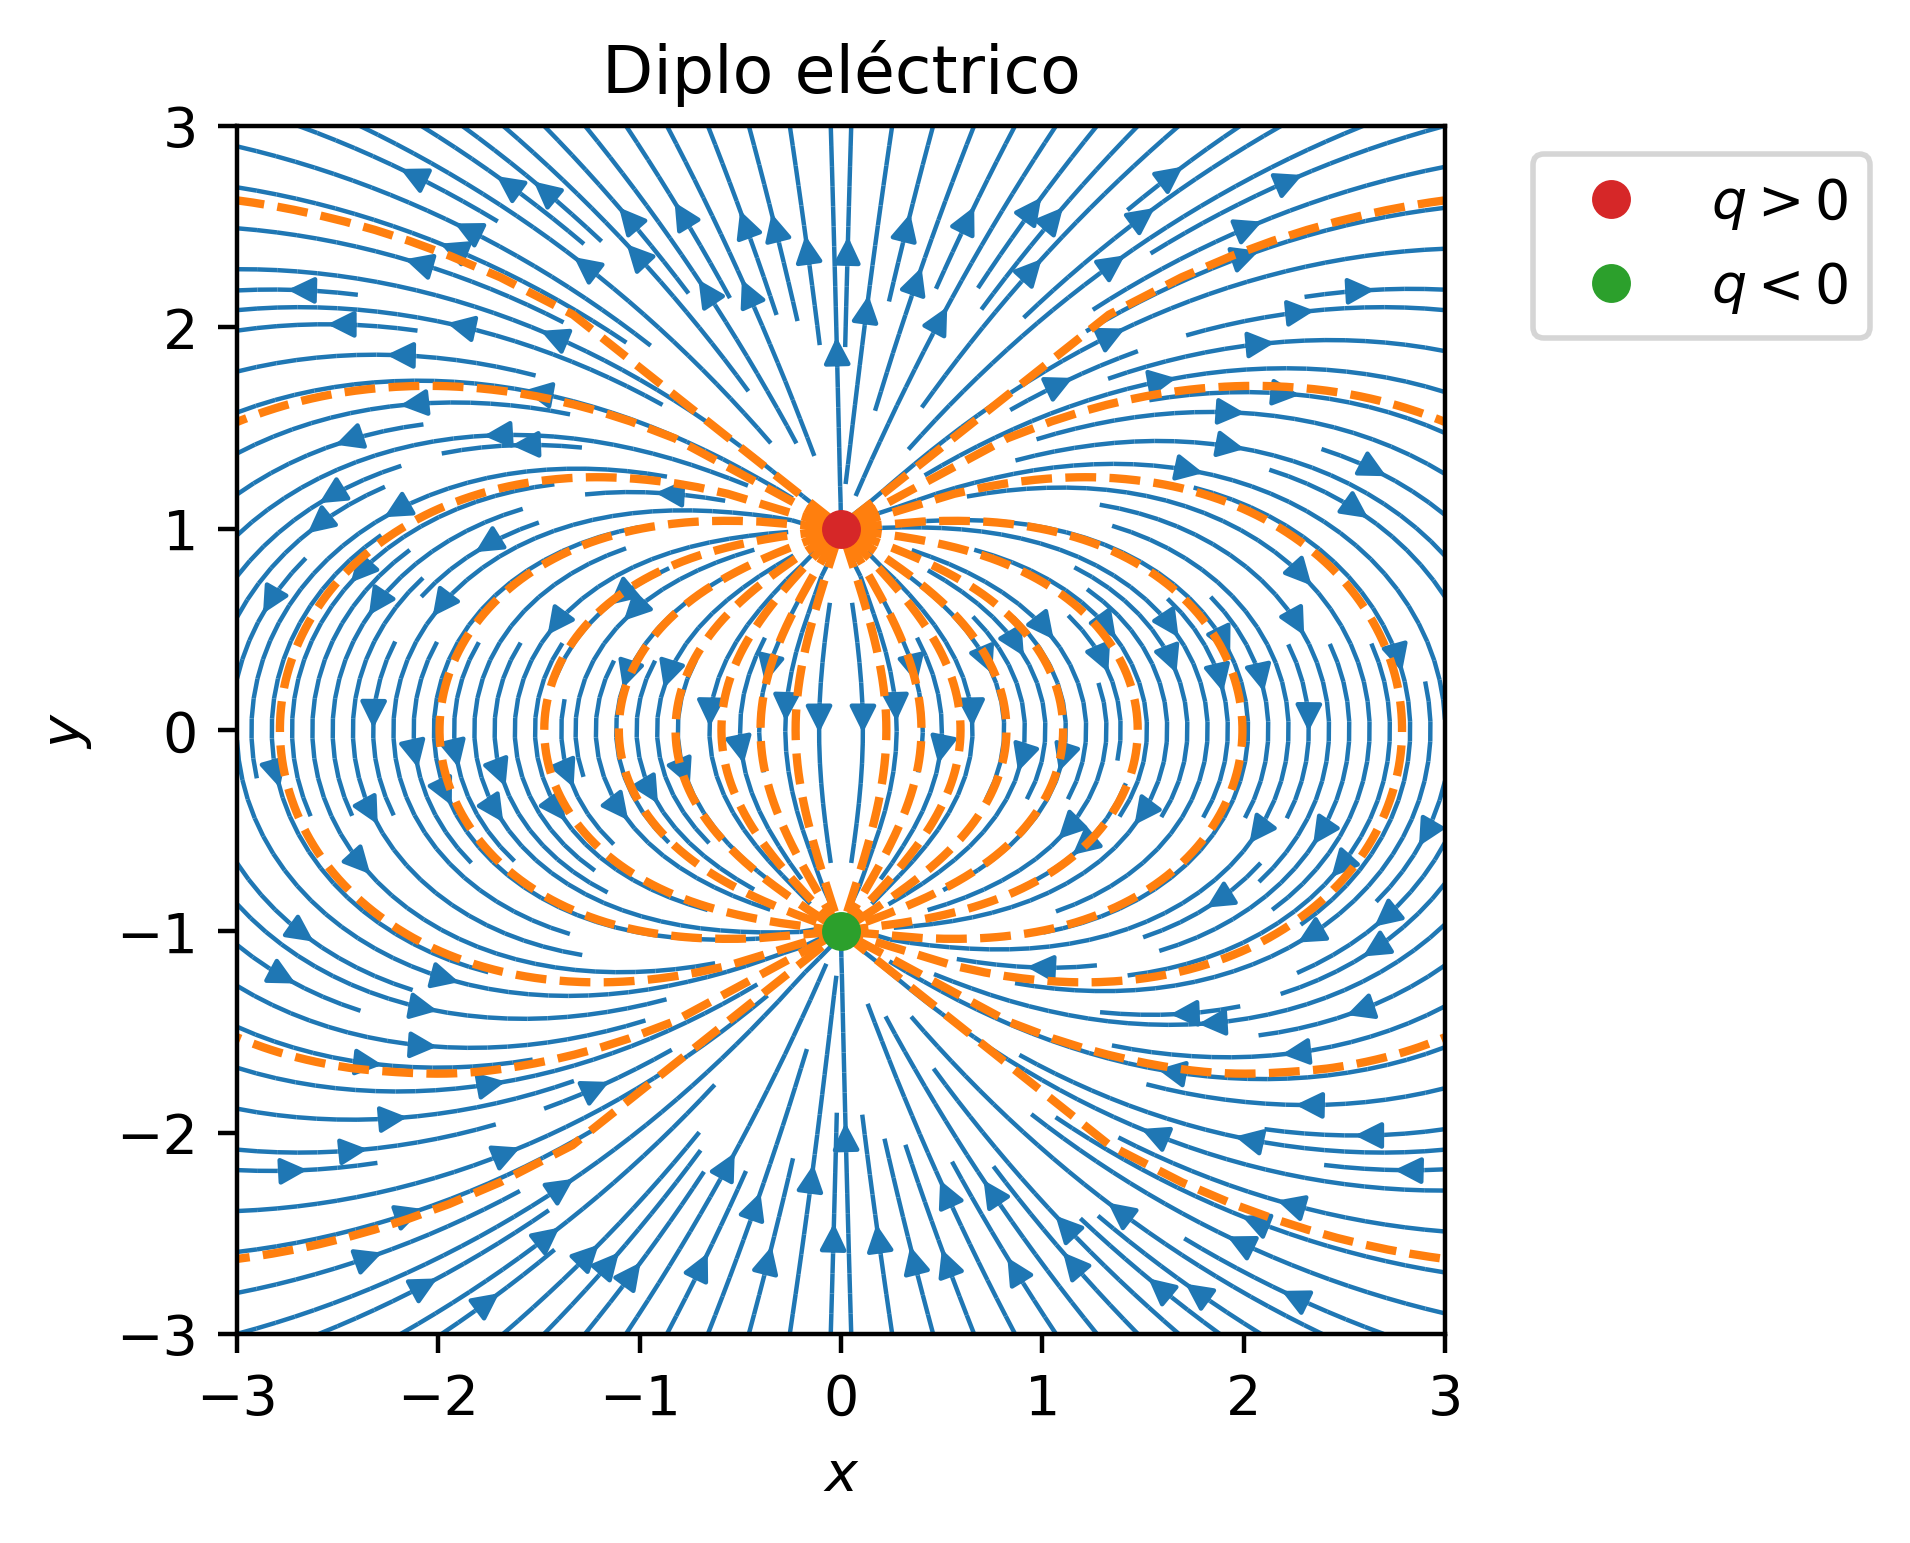

In [70]:
figure(dpi=200)

# campo
x,y = linspace(-3,3),linspace(-3,3)
xv,yv = meshgrid(x,y)
E = carga([xv,yv],[0,-1],-1) + carga([xv,yv],[0,1],1)
streamplot(xv,yv,E[0],E[1],density=2,linewidth=0.8,color="tab:blue")

# lineas de campo
angulos = linspace(-2*pi/5,pi/4,10)
angulos = concatenate((23*pi/20+angulos,angulos))
for angulo in angulos:
    p_ini = [0.05*cos(angulo),1+0.05*sin(angulo)]
    t = (0,1e3)
    sol_ODEivp = solve_ivp(dipolo,t,p_ini,events=condicion,dense_output=True)
    t_cont = linspace(0,sol_ODEivp.t[-1],500)
    plot(sol_ODEivp.sol(t_cont)[0,:],sol_ODEivp.sol(t_cont)[1,:],color="tab:orange",linestyle="dashed")

# cargas
plot([0],[1],'o',color="tab:red",label="$q>0$")
plot([0],[-1],'o',color="tab:green",label="$q<0$")

title("Diplo eléctrico"),xlabel("$x$"),ylabel("$y$"),gca().set_aspect("equal")
legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
xlim([-3,3]),ylim([-3,3])
show()

En el caso del cuadrupolo podemos hacer algo similar 

In [71]:
def cuadrupolo(t,x,x_q=[[0,-1],[0,1],[-1,0],[1,0]],qs=[1,1,-1,-1]):
    E = carga(x,x_q[0],qs[0]) + carga(x,x_q[1],qs[1])
    E += carga(x,x_q[2],qs[2]) + carga(x,x_q[2],qs[2])
    return E

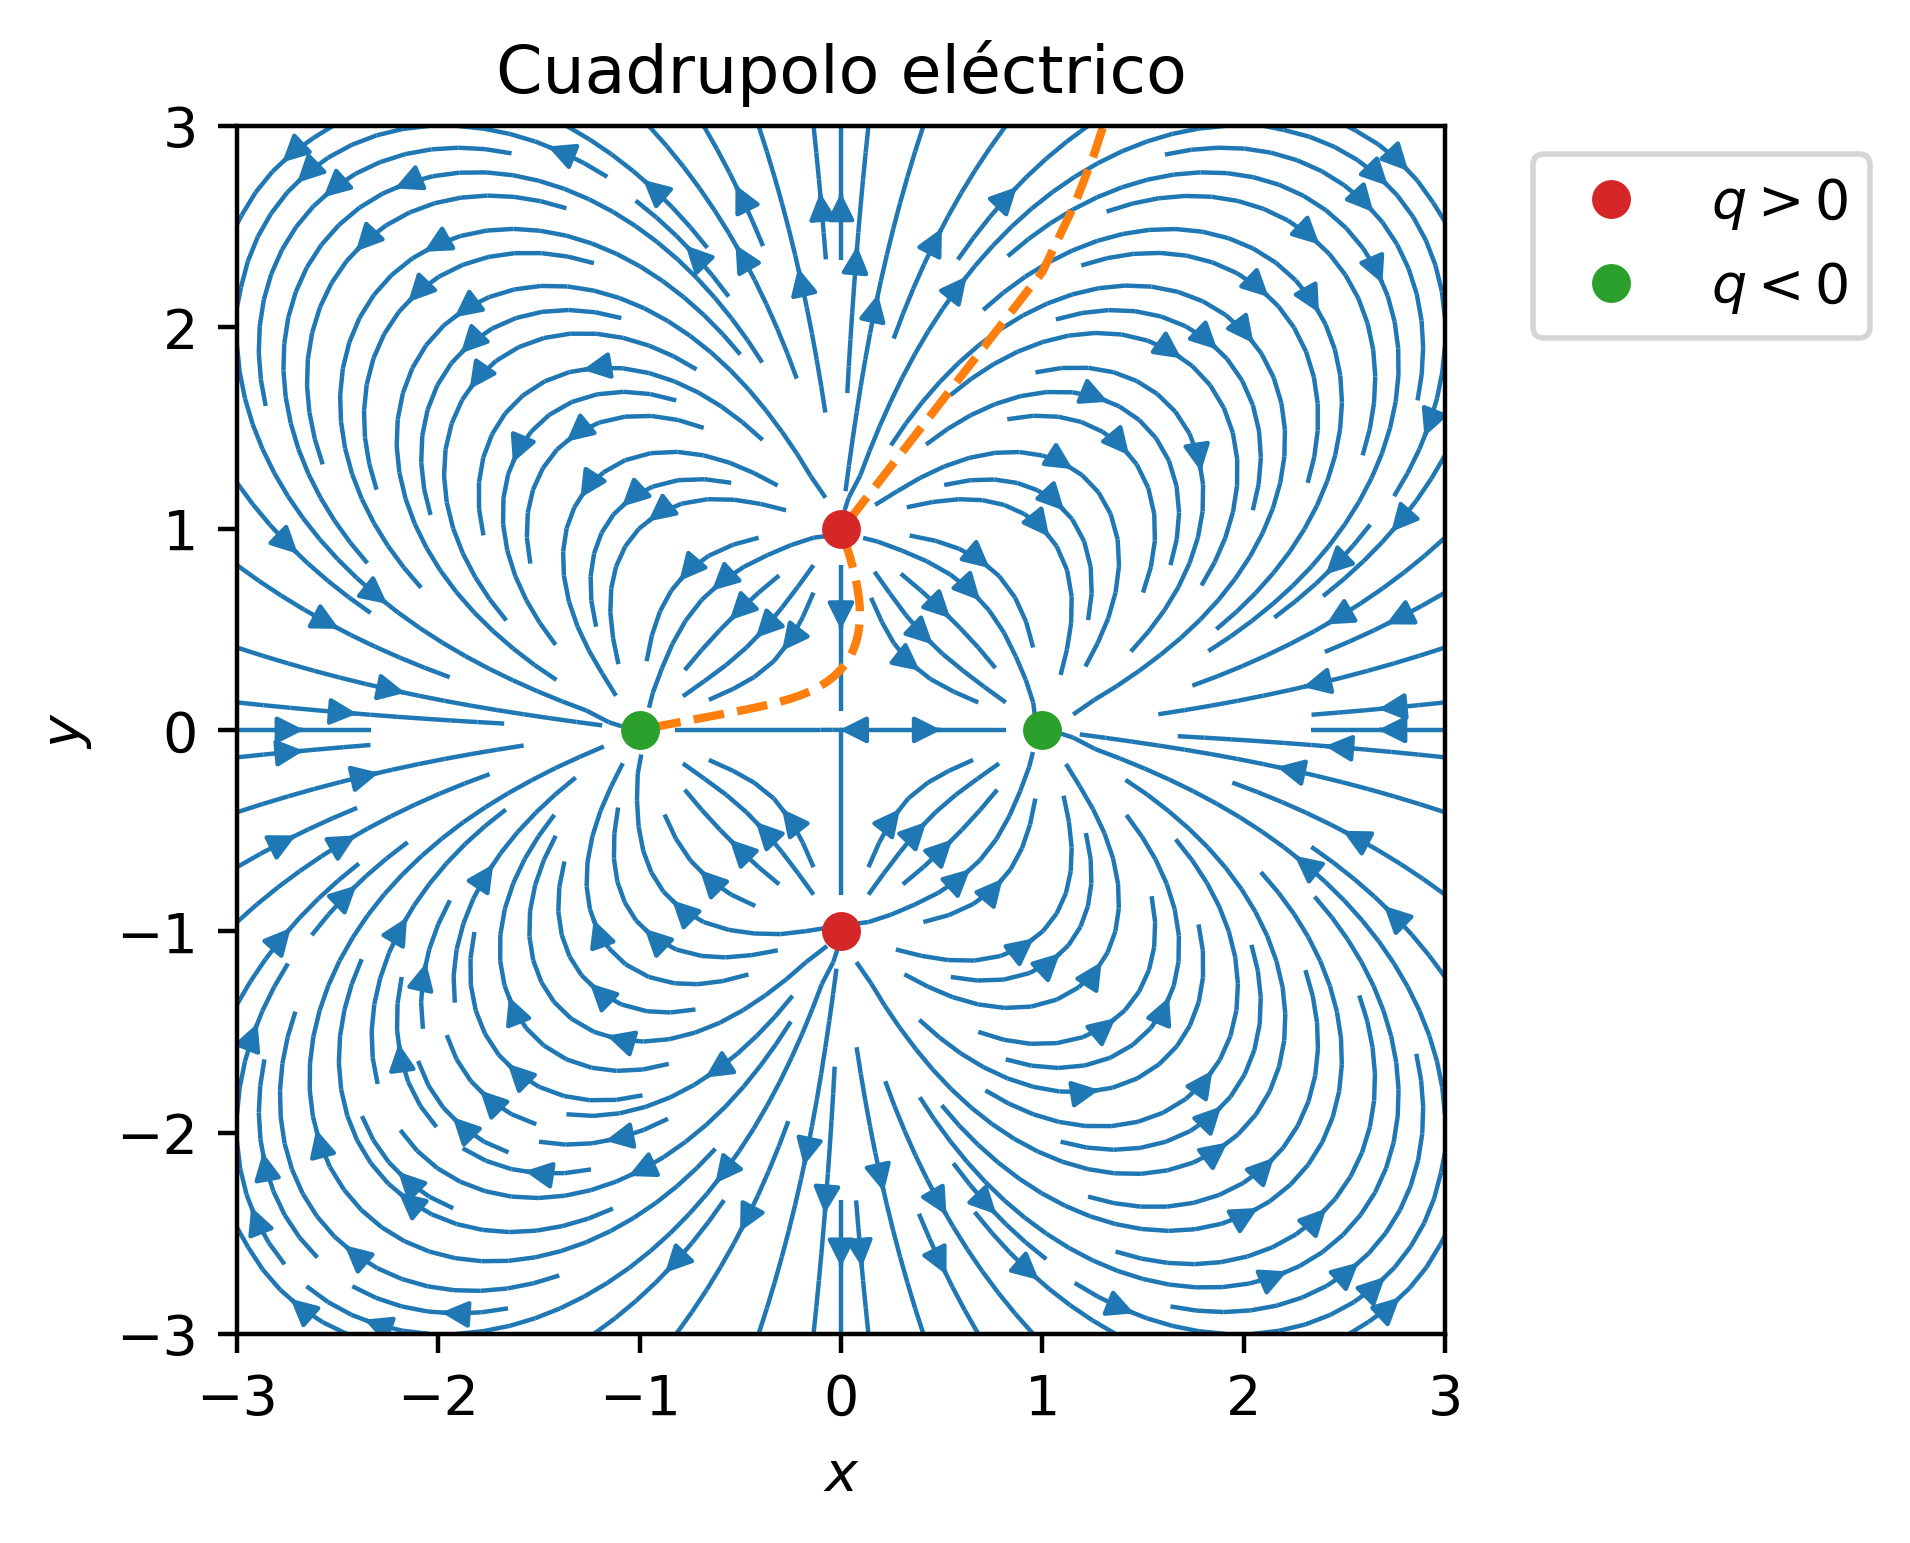

In [73]:
figure(dpi=200)

# campo
x,y = linspace(-3,3),linspace(-3,3)
xv,yv = meshgrid(x,y)
E = carga([xv,yv],[0,-1],1) + carga([xv,yv],[0,1],1) # Campo de un cuadrupolo parte 1
E += carga([xv,yv],[-1,0],-1) + carga([xv,yv],[1,0],-1) # Campo de un cuadrupolo parte 2
streamplot(xv,yv,E[0],E[1],density=1.5,linewidth=0.8)

# lineas de campo
angulos = linspace(-2*pi/5,pi/4,2)
#angulos = concatenate((23*pi/20+angulos,angulos))
for angulo in angulos:
    p_ini = [0.05*cos(angulo),1+0.05*sin(angulo)]
    t = (0,1e3)
    sol_ODEivp = solve_ivp(cuadrupolo,t,p_ini,events=condicion,dense_output=True)
    t_cont = linspace(0,sol_ODEivp.t[-1],500)
    plot(sol_ODEivp.sol(t_cont)[0,:],sol_ODEivp.sol(t_cont)[1,:],color="tab:orange",linestyle="dashed")

plot([0,0],[-1,1],'o',color="tab:red",label="$q>0$")
plot([-1,1],[0,0],'o',color="tab:green",label="$q<0$")
title("Cuadrupolo eléctrico"),xlabel("$x$"),ylabel("$y$"),gca().set_aspect("equal")
legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
xlim([-3,3]),ylim([-3,3])
show()



Regresar a la [página de las herramientas](http://sistemas.fciencias.unam.mx/~rich/Herramientas/).

Agradecimientos:
+ PAPIME PE 103021. *Idea original*